# ガウス分布


## データ
- N : データの個数
- y : データの値

## パラメータ
- mu : 平均値
- s2 : 分散

## モデル
$\sigma \sim Cauchy(0,0.5)$


$y_{n} \sim  N(\mu,\sigma)$

In [1]:
%matplotlib inline

In [2]:
import pystan
import numpy as np
import matplotlib.pyplot as plt

In [44]:
stan_code = """
data {
    int < lower = 0 > N;
    real y[N];
}

parameters {
    real mu;
    real < lower = 0 > s2;
}

model {
    s2 ~ cauchy(0, 5);
    y ~ normal(mu, sqrt(s2));
}
"""


stan_dat = {
    'N': 1000,
    'y': np.random.normal(1, 3, size = 1000)
}

fit = pystan.stan(model_code = stan_code, data = stan_dat, iter = 2500, chains = 4)
print(fit)

Inference for Stan model: anon_model_7b3f2cc55fff27b3b0318751fc294166.
4 chains, each with iter=2500; warmup=1250; thin=1; 
post-warmup draws per chain=1250, total post-warmup draws=5000.

       mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
mu     1.06  1.8e-3   0.09   0.88    1.0   1.06   1.12   1.25   2809    1.0
s2     8.99  6.6e-3   0.39   8.25   8.72   8.98   9.24   9.79   3451    1.0
lp__  -1597    0.02   0.99  -1599  -1597  -1596  -1596  -1596   2411    1.0

Samples were drawn using NUTS at Wed Nov  9 15:47:01 2016.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).


In [45]:
la = fit.extract(permuted=True)  # return a dictionary of arrays
print(np.mean(la["mu"]),np.std(la["mu"]))

1.06037278805 0.0947276845937


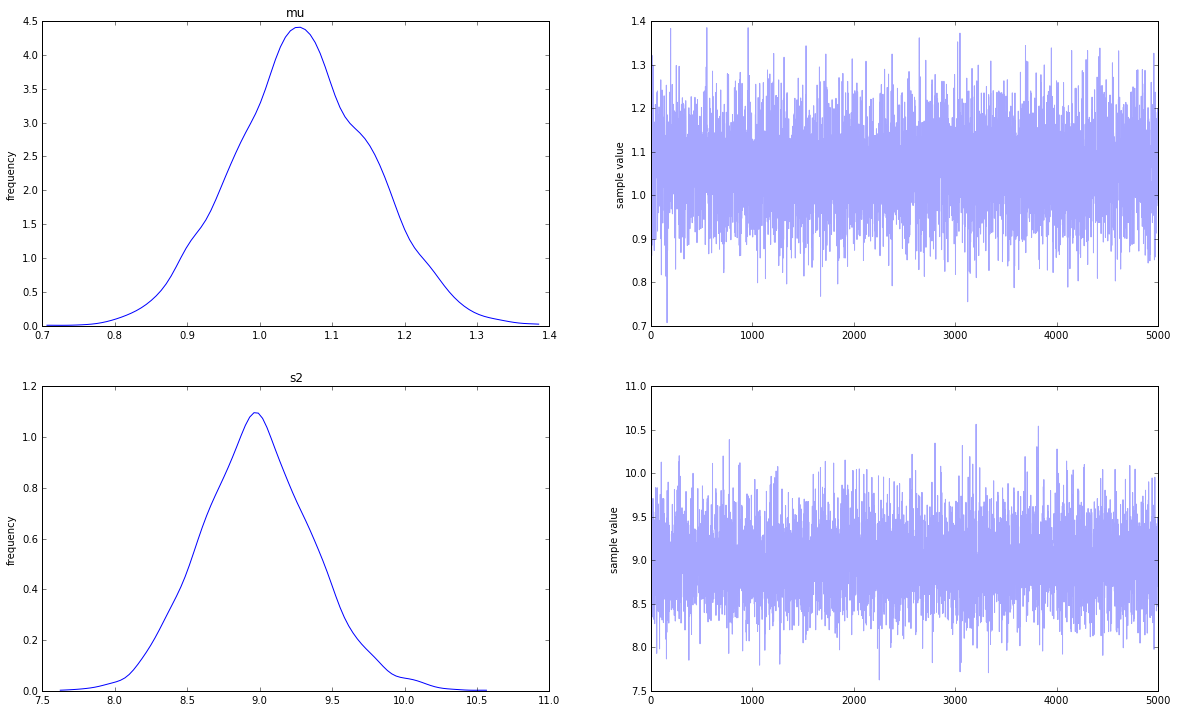

In [46]:
plt.rcParams['figure.figsize'] = (20, 12)
fit.plot()
plt.show()